In [2]:
from night_light_utils import *

city_cords = {
    'blr_x_start' : 1781,
    'blr_x_end' : 1870,
    'blr_y_start' : 1640,
    'blr_y_end' : 1738,
    
    'milan_x_start' : 2150,
    'milan_x_end' : 2262,
    'milan_y_start' : 1021,
    'milan_y_end' : 1117,
    
    'pune_x_start' : 880,
    'pune_x_end' : 957,
    'pune_y_start' : 286,
    'pune_y_end' : 377,
    
    'paris_x_start' : 428,
    'paris_x_end' : 656,
    'paris_y_start' : 227,
    'paris_y_end' : 350
    
}


In [3]:
jan01_h25 = week_loc_mean('h25v07', 2020, 1, 1, 1)

In [4]:
def cloud_loc_mean(tile, year, day_start, day_end, month):
    clouds = []
    for i in range(day_start, day_end + 1):
        day_file = (dt.date(year, month, i) - dt.date(year,1,1)).days + 1
        day_file = str(day_file).zfill(3)
        path = 'A' + str(year) + day_file + '.' + tile + '.h5'
        cloud = return_cloud('Data/' + path)
        clouds.append(cloud)
        
    return clouds

In [5]:
jan01_cloud = cloud_loc_mean('h25v07', 2020, 1, 1, 1)[0]
jan01_cloud = return_cloud_filter(cloud_data=jan01_cloud, threshold=128)

In [6]:
img_rad(jan01_cloud)

In [7]:
def return_cloud_free(tile, year, day_start, day_end, month):
    clean_tile = np.zeros((2400, 2400))
    clean_tile = np.matrix(clean_tile)
    
    average = np.zeros((2400, 2400))
    average = np.matrix(average)
    
    for i in range(day_start, day_end+1):
        tile_light = week_loc_mean(tile, year, i, i, month)
        tile_cloud = cloud_loc_mean(tile, year, i, i, month)[0]
        tile_filter = return_cloud_filter(cloud_data=tile_cloud, threshold=128)
        average = average + tile_filter
        clean_light = np.multiply(tile_light, tile_filter)
        clean_tile = clean_tile + clean_light
        
    clean_tile = np.divide(clean_tile, average, where=average>0)
    return clean_tile

In [39]:
img_rad(return_cloud_free('h25v07', 2020, 1, 1, 1))

In [43]:
img_rad(return_cloud_free('h25v07', 2020, 1, 31, 1))


In [19]:
a = np.multiply(jan01_h25, jan01_cloud)

In [42]:
img_rad(a)

In [24]:
img_rad(jan01_h25)
img_rad(return_cloud_filter(cloud_data=cloud_loc_mean('h25v07', 2020, 1, 1, 1)[0], threshold=128, scale_for_img=True))

In [48]:
jan_h25 = week_loc_mean('h25v07', 2020, 21, 27, 1)
cloud_jan_h25 = return_cloud_free('h25v07', 2020, 21, 27, 1)


In [83]:
cloud_no10 = np.multiply(cloud_jan_h25, (cloud_jan_h25)>10)
img_rad(cloud_no10)

In [198]:
10 / 2400

0.004166666666666667

In [136]:
#>40 version - commercial
print("Jan num pixels is " + str(((jan_h25)>=500).sum()))
print("Feb num pixels is " + str(((feb_h25)>=500).sum()))
print("Mar num pixels is " + str(((mar_h25)>=500).sum()))
print("Apr num pixels is " + str(((apr_h25)>=500).sum()))


Jan num pixels is 4307
Feb num pixels is 4083
Mar num pixels is 2400
Apr num pixels is 1546


In [195]:
# 20 - 40 - administrative
print("Jan num pixels is " + str(((jan_h25>=190) & (jan_h25<500)).sum()))
print("Feb num pixels is " + str(((feb_h25>=190) & (feb_h25<500)).sum()))
print("Mar num pixels is " + str(((mar_h25>=190) & (mar_h25<500)).sum()))
print("Apr num pixels is " + str(((apr_h25>=190) & (apr_h25<500)).sum()))

Jan num pixels is 18986
Feb num pixels is 18743
Mar num pixels is 15760
Apr num pixels is 14936


In [196]:
#<20 - residential
print("Jan num pixels is " + str(((jan_h25>=30) & (jan_h25<190)).sum()))
print("Feb num pixels is " + str(((feb_h25>=30) & (feb_h25<190)).sum()))
print("Mar num pixels is " + str(((mar_h25>=30) & (mar_h25<190)).sum()))
print("Apr num pixels is " + str(((apr_h25>=30) & (apr_h25<190)).sum()))

Jan num pixels is 146053
Feb num pixels is 154095
Mar num pixels is 129856
Apr num pixels is 118554


In [197]:
#<5 - Noise
print("Jan num pixels is " + str(((jan_h25<30)).sum()))
print("Feb num pixels is " + str(((feb_h25<30)).sum()))
print("Mar num pixels is " + str(((mar_h25<30)).sum()))
print("Apr num pixels is " + str(((apr_h25<30)).sum()))

Jan num pixels is 5590654
Feb num pixels is 5583079
Mar num pixels is 5611984
Apr num pixels is 5624964


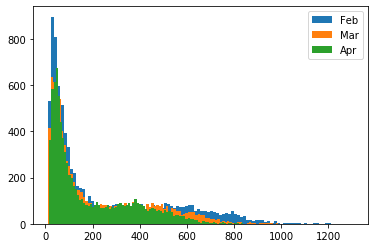

In [199]:

light_hist([feb_blr, mar_blr, apr_blr], ['Feb', 'Mar', 'Apr'])

In [149]:
max_val = 200
#filter_res = np.multiply(cloud_jan_h25, (cloud_jan_h25)>=100)
filter_res = np.multiply(cloud_jan_h25, (cloud_jan_h25)<=250)
#filter_res = np.multiply(filter_res, (filter_res)<100)
filter_res = filter_res * (255 / max_val)
img_rad(filter_res)


In [99]:
scaled_jan = (jan_h25 * 255) / scale
img_rad(scaled_jan)

In [58]:

feb_h25 = week_loc_mean('h25v07', 2020, 20, 26, 2)
cloud_feb_h25 = return_cloud_free('h25v07', 2020, 20, 26, 2)
img_rad(feb_h25)
img_rad(cloud_feb_h25)

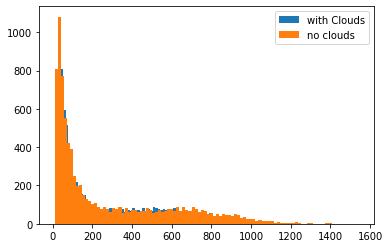

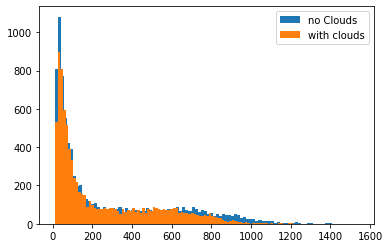

In [59]:
clouds_include = city_from_cords(city_cords['blr_x_start'], city_cords['blr_x_end'], city_cords['blr_y_start'], city_cords['blr_y_end'], feb_h25)
n_clouds = city_from_cords(city_cords['blr_x_start'], city_cords['blr_x_end'], city_cords['blr_y_start'], city_cords['blr_y_end'], cloud_feb_h25)

light_hist([clouds_include, n_clouds], ['with Clouds', 'no clouds'])
light_hist([n_clouds, clouds_include], ['no Clouds', 'with clouds'])

In [80]:
temp = (feb_h25>800)
temp = temp * 257
im = Image.fromarray((temp).astype(np.int16))
im.show()

In [72]:
Image.fromarray(temp)

TypeError: Cannot handle this data type

In [76]:
img_rad(feb_h25)

In [71]:
feb_h25

matrix([[ 2.28571429,  2.71428571,  3.14285714, ..., 19.71428571,
         15.42857143, 18.71428571],
        [ 1.71428571,  1.42857143,  2.57142857, ...,  7.        ,
         11.28571429, 12.42857143],
        [ 1.71428571,  1.42857143,  2.        , ...,  5.42857143,
          5.71428571,  5.28571429],
        ...,
        [ 2.71428571,  3.        ,  3.        , ...,  1.85714286,
          2.42857143,  1.71428571],
        [ 2.42857143,  2.85714286,  3.28571429, ...,  2.14285714,
          2.71428571,  2.14285714],
        [ 3.        ,  3.14285714,  2.71428571, ...,  3.14285714,
          2.57142857,  2.42857143]])

In [70]:
img_rad(temp)

TypeError: Cannot handle this data type

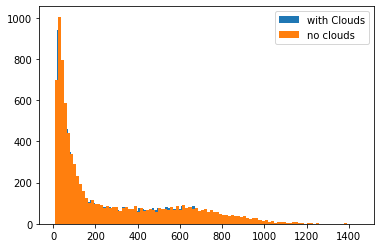

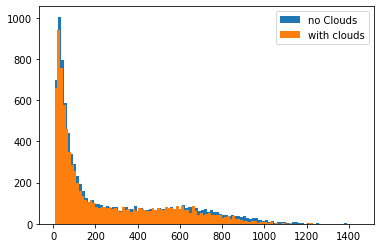

In [57]:
clouds_include = city_from_cords(city_cords['blr_x_start'], city_cords['blr_x_end'], city_cords['blr_y_start'], city_cords['blr_y_end'], jan_h25)
n_clouds = city_from_cords(city_cords['blr_x_start'], city_cords['blr_x_end'], city_cords['blr_y_start'], city_cords['blr_y_end'], cloud_jan_h25)

light_hist([clouds_include, n_clouds], ['with Clouds', 'no clouds'])
light_hist([n_clouds, clouds_include], ['no Clouds', 'with clouds'])

In [17]:
rename_data()

Starting Renaming      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      .      Renaming Data Finished


In [11]:
def create_file(tile):
    hf = h5py.File('Output/test.h5', 'r+')
    HDFEOS = hf['HDFEOS']
    grids = HDFEOS['GRIDS']
    vnp = grids['VNP_Grid_DNB']
    data = vnp['Data Fields']
    data['DNB_At_Sensor_Radiance_500m'][...] = np.array(tile)
    hf.close()

In [15]:
img_rad(oct_h25)

In [13]:
create_file('Oct_h25_trial.h5', oct_h25)

In [8]:
hf = h5py.File('Data/A2019298.h25v07.h5', 'r')
info = hf['HDFEOS INFORMATION']
metadata = info['StructMetadata.0']

In [51]:
info

<HDF5 group "/HDFEOS INFORMATION" (1 members)>

In [45]:
img_rad(jan_h25)

In [8]:
oct_h25 = week_loc_mean('h25v07', 2019, 25, 31, 10)

nov_h25 = week_loc_mean('h25v07', 2019, 23, 29, 11)

dec_h25 = week_loc_mean('h25v07', 2019, 23, 29, 12)

jan_h25 = week_loc_mean('h25v07', 2020, 21, 27, 1)

feb_h25 = week_loc_mean('h25v07', 2020, 20, 26, 2)

mar_h25 = week_loc_mean('h25v07', 2020, 21, 27, 3)

apr_h25 = week_loc_mean('h25v07', 2020, 20, 26, 4)

may_h25 = week_loc_mean('h25v07', 2020, 19, 25, 5)

In [9]:
img_rad(oct_h25)

In [10]:
def return_city_data(city, city_cords, tiles):
    city_data = []
    for tile in tiles:
        city_data.append(city_from_cords(city_cords[city + '_x_start'], city_cords[city + '_x_end'], city_cords[city + '_y_start'], city_cords[city + '_y_end'], tile))
    return city_data

In [11]:
oct_blr2, nov_blr2, nov_blr2, nov_blr2, dec_blr2, jan_blr2, feb_blr2, mar_blr2 = return_city_data('blr', city_cords, [oct_h25, nov_h25, dec_h25, jan_h25, feb_h25, mar_h25, apr_h25, may_h25])

In [33]:
img_rad(jan_h25)

In [151]:
oct_blr = city_from_cords(city_cords['blr_x_start'], city_cords['blr_x_end'], city_cords['blr_y_start'], city_cords['blr_y_end'], oct_h25)

nov_blr = city_from_cords(city_cords['blr_x_start'], city_cords['blr_x_end'], city_cords['blr_y_start'], city_cords['blr_y_end'], nov_h25)

dec_blr = city_from_cords(city_cords['blr_x_start'], city_cords['blr_x_end'], city_cords['blr_y_start'], city_cords['blr_y_end'], dec_h25)

jan_blr = city_from_cords(city_cords['blr_x_start'], city_cords['blr_x_end'], city_cords['blr_y_start'], city_cords['blr_y_end'], jan_h25)

feb_blr = city_from_cords(city_cords['blr_x_start'], city_cords['blr_x_end'], city_cords['blr_y_start'], city_cords['blr_y_end'], feb_h25)

mar_blr = city_from_cords(city_cords['blr_x_start'], city_cords['blr_x_end'], city_cords['blr_y_start'], city_cords['blr_y_end'], mar_h25)

apr_blr = city_from_cords(city_cords['blr_x_start'], city_cords['blr_x_end'], city_cords['blr_y_start'], city_cords['blr_y_end'], apr_h25)

may_blr = city_from_cords(city_cords['blr_x_start'], city_cords['blr_x_end'], city_cords['blr_y_start'], city_cords['blr_y_end'], may_h25)

In [6]:
np.round(0.4)

0.0

In [7]:
def quadrant_city(city_tile):
    h2 = int(np.round(city_tile.shape[0] / 2))
    w2 = int(np.round(city_tile.shape[1] / 2))
    h, w = city_tile.shape
    q1 = city_tile[0: h2, 0:w2];      q2 = city_tile[0: h2, w2:w]
    q3 = city_tile[h2: h, 0:w2];      q4 = city_tile[h2: h, w2:w]
    
    return q1, q2, q3, q4


In [12]:
img_rad(oct_blr)
img_rad(oct_q1_blr)
img_rad(oct_q2_blr)
img_rad(oct_q3_blr)
img_rad(oct_q4_blr)

In [23]:
plot_diff_filter(apr_q1_blr, feb_q1_blr)

In [20]:
oct_q1_blr, oct_q2_blr, oct_q3_blr, oct_q4_blr = quadrant_city(oct_pune)
nov_q1_blr, nov_q2_blr, nov_q3_blr, nov_q4_blr = quadrant_city(nov_pune)
dec_q1_blr, dec_q2_blr, dec_q3_blr, dec_q4_blr = quadrant_city(dec_pune)
jan_q1_blr, jan_q2_blr, jan_q3_blr, jan_q4_blr = quadrant_city(jan_pune)
feb_q1_blr, feb_q2_blr, feb_q3_blr, feb_q4_blr = quadrant_city(feb_pune)
mar_q1_blr, mar_q2_blr, mar_q3_blr, mar_q4_blr = quadrant_city(mar_pune)
apr_q1_blr, apr_q2_blr, apr_q3_blr, apr_q4_blr = quadrant_city(apr_pune)
may_q1_blr, may_q2_blr, may_q3_blr, may_q4_blr = quadrant_city(may_pune)


q1_mean = []
q2_mean = []
q3_mean = []
q4_mean = []

q1_mean.append(single_loc_mean(oct_q1_blr))
q1_mean.append(single_loc_mean(nov_q1_blr))
q1_mean.append(single_loc_mean(dec_q1_blr))
q1_mean.append(single_loc_mean(jan_q1_blr))
q1_mean.append(single_loc_mean(feb_q1_blr))
q1_mean.append(single_loc_mean(mar_q1_blr))
q1_mean.append(single_loc_mean(apr_q1_blr))
q1_mean.append(single_loc_mean(may_q1_blr))

q2_mean.append(single_loc_mean(oct_q2_blr))
q2_mean.append(single_loc_mean(nov_q2_blr))
q2_mean.append(single_loc_mean(dec_q2_blr))
q2_mean.append(single_loc_mean(jan_q2_blr))
q2_mean.append(single_loc_mean(feb_q2_blr))
q2_mean.append(single_loc_mean(mar_q2_blr))
q2_mean.append(single_loc_mean(apr_q2_blr))
q2_mean.append(single_loc_mean(may_q2_blr))

q3_mean.append(single_loc_mean(oct_q3_blr))
q3_mean.append(single_loc_mean(nov_q3_blr))
q3_mean.append(single_loc_mean(dec_q3_blr))
q3_mean.append(single_loc_mean(jan_q3_blr))
q3_mean.append(single_loc_mean(feb_q3_blr))
q3_mean.append(single_loc_mean(mar_q3_blr))
q3_mean.append(single_loc_mean(apr_q3_blr))
q3_mean.append(single_loc_mean(may_q3_blr))

q4_mean.append(single_loc_mean(oct_q4_blr))
q4_mean.append(single_loc_mean(nov_q4_blr))
q4_mean.append(single_loc_mean(dec_q4_blr))
q4_mean.append(single_loc_mean(jan_q4_blr))
q4_mean.append(single_loc_mean(feb_q4_blr))
q4_mean.append(single_loc_mean(mar_q4_blr))
q4_mean.append(single_loc_mean(apr_q4_blr))
q4_mean.append(single_loc_mean(may_q4_blr))

months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']

In [21]:
trace1 = go.Scatter(
                    x = months,
                    y = q1_mean,
                    mode = "lines+markers",
                    name = "Q1",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= 'Q1')
# Creating trace2
trace2 = go.Scatter(
                    x = months,
                    y = q2_mean,
                    mode = "lines+markers",
                    name = "Q2",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= 'Q2')

trace3 = go.Scatter(
                    x = months,
                    y = q3_mean,
                    mode = "lines+markers",
                    name = "Q3",
                    marker = dict(color = 'rgba(255, 0, 10, 0.8)'),
                    text= 'Q3')

trace4 = go.Scatter(
                    x = months,
                    y = q4_mean,
                    mode = "lines+markers",
                    name = "Q4",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),
                    text= 'Q4')

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Night Light for Different Months segmented by quadrant for Pune',
              xaxis= dict(title= 'Month',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [18]:
trace1 = go.Scatter(
                    x = months,
                    y = q1_mean,
                    mode = "lines+markers",
                    name = "Q1",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= 'Q1')
# Creating trace2
trace2 = go.Scatter(
                    x = months,
                    y = q2_mean,
                    mode = "lines+markers",
                    name = "Q2",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= 'Q2')

trace3 = go.Scatter(
                    x = months,
                    y = q3_mean,
                    mode = "lines+markers",
                    name = "Q3",
                    marker = dict(color = 'rgba(255, 0, 10, 0.8)'),
                    text= 'Q3')

trace4 = go.Scatter(
                    x = months,
                    y = q4_mean,
                    mode = "lines+markers",
                    name = "Q4",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),
                    text= 'Q4')

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Night Light for Different Months segmented by quadrant for Bangalore',
              xaxis= dict(title= 'Month',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [15]:
hist = oct_blr.reshape(98*89,1)

In [16]:
hist.shape

(8722, 1)

In [11]:
def light_hist(tiles, legend, bins=100):
    for i in tiles:
        plt.hist(i.reshape(i.shape[0]*i.shape[1], 1), bins=bins)
    plt.legend(legend)
    plt.show()

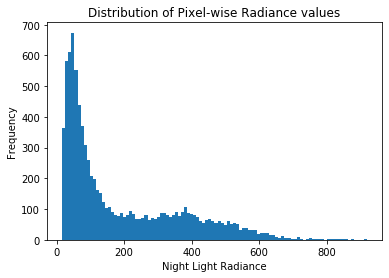

In [13]:
import matplotlib.pyplot as plt
plt.hist(feb_blr2.reshape(98*89,1), bins=100)
plt.title("Distribution of Pixel-wise Radiance values")
plt.xlabel("Night Light Radiance")
plt.ylabel("Frequency")
plt.show()

In [19]:
oct_pune = city_from_cords(city_cords['pune_x_start'], city_cords['pune_x_end'], city_cords['pune_y_start'], city_cords['pune_y_end'], oct_h25)

nov_pune = city_from_cords(city_cords['pune_x_start'], city_cords['pune_x_end'], city_cords['pune_y_start'], city_cords['pune_y_end'], nov_h25)

dec_pune = city_from_cords(city_cords['pune_x_start'], city_cords['pune_x_end'], city_cords['pune_y_start'], city_cords['pune_y_end'], dec_h25)

jan_pune = city_from_cords(city_cords['pune_x_start'], city_cords['pune_x_end'], city_cords['pune_y_start'], city_cords['pune_y_end'], jan_h25)

feb_pune = city_from_cords(city_cords['pune_x_start'], city_cords['pune_x_end'], city_cords['pune_y_start'], city_cords['pune_y_end'], feb_h25)

mar_pune = city_from_cords(city_cords['pune_x_start'], city_cords['pune_x_end'], city_cords['pune_y_start'], city_cords['pune_y_end'], mar_h25)

apr_pune = city_from_cords(city_cords['pune_x_start'], city_cords['pune_x_end'], city_cords['pune_y_start'], city_cords['pune_y_end'], apr_h25)

may_pune = city_from_cords(city_cords['pune_x_start'], city_cords['pune_x_end'], city_cords['pune_y_start'], city_cords['pune_y_end'], may_h25)

In [5]:
oct_h18 = week_loc_mean('h18v04', 2019, 25, 31, 10)

nov_h18 = week_loc_mean('h18v04', 2019, 23, 29, 11)

dec_h18 = week_loc_mean('h18v04', 2019, 23, 29, 12)

jan_h18 = week_loc_mean('h18v04', 2020, 21, 27, 1)

feb_h18 = week_loc_mean('h18v04', 2020, 20, 26, 2)

mar_h18 = week_loc_mean('h18v04', 2020, 21, 27, 3)

apr_h18 = week_loc_mean('h18v04', 2020, 20, 26, 4)

may_h18 = week_loc_mean('h18v04', 2020, 19, 25, 5)

In [22]:
img_rad(oct_blr)

In [6]:
oct_paris = city_from_cords(city_cords['paris_x_start'], city_cords['paris_x_end'], city_cords['paris_y_start'], city_cords['paris_y_end'], oct_h18)

nov_paris = city_from_cords(city_cords['paris_x_start'], city_cords['paris_x_end'], city_cords['paris_y_start'], city_cords['paris_y_end'], nov_h18)

dec_paris = city_from_cords(city_cords['paris_x_start'], city_cords['paris_x_end'], city_cords['paris_y_start'], city_cords['paris_y_end'], dec_h18)

jan_paris = city_from_cords(city_cords['paris_x_start'], city_cords['paris_x_end'], city_cords['paris_y_start'], city_cords['paris_y_end'], jan_h18)

feb_paris = city_from_cords(city_cords['paris_x_start'], city_cords['paris_x_end'], city_cords['paris_y_start'], city_cords['paris_y_end'], feb_h18)

mar_paris = city_from_cords(city_cords['paris_x_start'], city_cords['paris_x_end'], city_cords['paris_y_start'], city_cords['paris_y_end'], mar_h18)

apr_paris = city_from_cords(city_cords['paris_x_start'], city_cords['paris_x_end'], city_cords['paris_y_start'], city_cords['paris_y_end'], apr_h18)

may_paris = city_from_cords(city_cords['paris_x_start'], city_cords['paris_x_end'], city_cords['paris_y_start'], city_cords['paris_y_end'], may_h18)

## MILAN =+++++==++====

oct_milan = city_from_cords(city_cords['milan_x_start'], city_cords['milan_x_end'], city_cords['milan_y_start'], city_cords['milan_y_end'], oct_h18)

nov_milan = city_from_cords(city_cords['milan_x_start'], city_cords['milan_x_end'], city_cords['milan_y_start'], city_cords['milan_y_end'], nov_h18)

dec_milan = city_from_cords(city_cords['milan_x_start'], city_cords['milan_x_end'], city_cords['milan_y_start'], city_cords['milan_y_end'], dec_h18)

jan_milan = city_from_cords(city_cords['milan_x_start'], city_cords['milan_x_end'], city_cords['milan_y_start'], city_cords['milan_y_end'], jan_h18)

feb_milan = city_from_cords(city_cords['milan_x_start'], city_cords['milan_x_end'], city_cords['milan_y_start'], city_cords['milan_y_end'], feb_h18)

mar_milan = city_from_cords(city_cords['milan_x_start'], city_cords['milan_x_end'], city_cords['milan_y_start'], city_cords['milan_y_end'], mar_h18)

apr_milan = city_from_cords(city_cords['milan_x_start'], city_cords['milan_x_end'], city_cords['milan_y_start'], city_cords['milan_y_end'], apr_h18)

may_milan = city_from_cords(city_cords['milan_x_start'], city_cords['milan_x_end'], city_cords['milan_y_start'], city_cords['milan_y_end'], may_h18)

In [7]:
lights_pune = []
months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']

lights_pune.append(single_loc_mean(oct_pune))
lights_pune.append(single_loc_mean(nov_pune))
lights_pune.append(single_loc_mean(dec_pune))
lights_pune.append(single_loc_mean(jan_pune))
lights_pune.append(single_loc_mean(feb_pune))
lights_pune.append(single_loc_mean(mar_pune))
lights_pune.append(single_loc_mean(apr_pune))
lights_pune.append(single_loc_mean(may_pune))

In [8]:
lights_milan = []
months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']

lights_milan.append(single_loc_mean(oct_milan))
lights_milan.append(single_loc_mean(nov_milan))
lights_milan.append(single_loc_mean(dec_milan))
lights_milan.append(single_loc_mean(jan_milan))
lights_milan.append(single_loc_mean(feb_milan))
lights_milan.append(single_loc_mean(mar_milan))
lights_milan.append(single_loc_mean(apr_milan))
lights_milan.append(single_loc_mean(may_milan))


lights_paris = []
months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']

lights_paris.append(single_loc_mean(oct_paris))
lights_paris.append(single_loc_mean(nov_paris))
lights_paris.append(single_loc_mean(dec_paris))
lights_paris.append(single_loc_mean(jan_paris))
lights_paris.append(single_loc_mean(feb_paris))
lights_paris.append(single_loc_mean(mar_paris))
lights_paris.append(single_loc_mean(apr_paris))
lights_paris.append(single_loc_mean(may_paris))

In [9]:
lights = []
months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']

lights.append(single_loc_mean(oct_blr))
lights.append(single_loc_mean(nov_blr))
lights.append(single_loc_mean(dec_blr))
lights.append(single_loc_mean(jan_blr))
lights.append(single_loc_mean(feb_blr))
lights.append(single_loc_mean(mar_blr))
lights.append(single_loc_mean(apr_blr))
lights.append(single_loc_mean(may_blr))

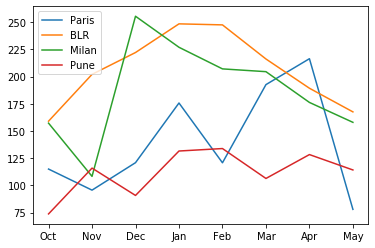

In [58]:
plt.plot(months, lights_paris)
plt.plot(months, lights)
plt.plot(months, lights_milan)
plt.plot(months, lights_pune)
plt.legend(['Paris', 'BLR', 'Milan', 'Pune'])
plt.show()

In [16]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [19]:
trace1 = go.Scatter(
                    x = months,
                    y = lights,
                    mode = "lines+markers",
                    name = "BLR",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= 'BLR')
# Creating trace2
trace2 = go.Scatter(
                    x = months,
                    y = lights_paris,
                    mode = "lines+markers",
                    name = "Paris",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= 'Paris')

trace3 = go.Scatter(
                    x = months,
                    y = lights_milan,
                    mode = "lines+markers",
                    name = "Milan",
                    marker = dict(color = 'rgba(255, 0, 10, 0.8)'),
                    text= 'Milan')

trace4 = go.Scatter(
                    x = months,
                    y = lights_pune,
                    mode = "lines+markers",
                    name = "Pune",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),
                    text= 'Pune')

data = [trace1, trace2, trace3, trace4]
layout = dict(title = 'Night Light for Different Months',
              xaxis= dict(title= 'Month',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [28]:
def plot_diff_filter(m2, m1, p_decline=0, p_increase=0):
    diff = m2 - m1
    inc = np.multiply(diff, (diff>0))
    inc = np.multiply(inc, ((inc / m1) > p_increase))    
    dcr = np.abs(np.multiply(diff, (diff<0)))
    dcr = np.multiply(dcr, ((dcr / m1) > p_decline))
    
    gr = np.zeros(inc.shape)
    rgb = np.array([dcr, inc ,gr])
    temp = np.dstack(rgb)
    temp = temp / np.amax(diff)
    rgbArray = np.zeros((gr.shape[0],gr.shape[1],3), 'uint8')
    rgbArray[..., 0] = temp[:, :, 0] * 255
    rgbArray[..., 1] = temp[:, :, 1] * 255
    rgbArray[..., 2] = temp[:, :, 2] * 255
    img = Image.fromarray(rgbArray)
    img.show()



In [6]:
def return_diff(m2, m1, p_decline=0, p_increase=0, inc_dcr=False):
    diff = m2 - m1
    inc = np.multiply(diff, (diff>0))
    inc = np.multiply(inc, ((inc / m1) > p_increase))    
    dcr = np.abs(np.multiply(diff, (diff<0)))
    dcr = np.multiply(dcr, ((dcr / m1) > p_decline))
    
    if inc_dcr:
        return inc
    else:
        return dcr

In [7]:
apr_feb_h25 = return_diff(apr_h25, feb_h25)

In [12]:
create_file(apr_feb_h25)

In [20]:
plot_diff2(mar_paris, feb_paris)

In [23]:
plot_diff2(apr_blr, feb_blr)

In [32]:
plot_diff_filter(mar_blr, feb_blr, 0.4)

In [158]:
diff = mar_paris - feb_paris

In [159]:
inc = np.multiply(diff, (diff>0))
dcr = np.abs(np.multiply(diff, (diff<0)))
gr = np.zeros(inc.shape)

In [160]:
a = np.array([dcr, inc ,gr])
temp = np.dstack(a)
temp = temp / 370

In [161]:
rgbArray = np.zeros((gr.shape[0],gr.shape[1],3), 'uint8')
rgbArray[..., 0] = temp[:, :, 0] * 255
rgbArray[..., 1] = temp[:, :, 1] * 255
rgbArray[..., 2] = temp[:, :, 2] * 255

In [162]:
img = Image.fromarray(rgbArray)
img.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


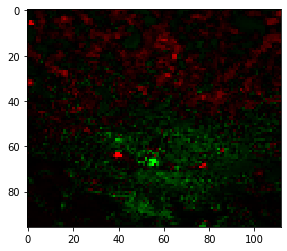

In [163]:
plt.imshow(temp)

In [124]:
img = Image.fromarray(temp, 'RGB')
img.show()

In [67]:
img_rad(oct_pune)
img_rad(nov_pune)
img_rad(dec_pune)
img_rad(jan_pune)
img_rad(feb_pune)
img_rad(mar_pune)
img_rad(apr_pune)
img_rad(may_pune)

In [44]:
img_rad(oct_paris)
img_rad(nov_paris)
img_rad(dec_paris)
img_rad(jan_paris)
img_rad(feb_paris)
img_rad(mar_paris)
img_rad(apr_paris)
img_rad(may_paris)

In [9]:
img_rad(oct_blr)
img_rad(nov_blr)
img_rad(dec_blr)
img_rad(jan_blr)
img_rad(feb_blr)
img_rad(mar_blr)
img_rad(apr_blr)
img_rad(may_blr)


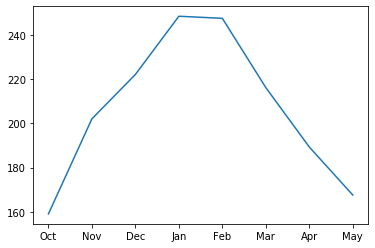

In [39]:
import matplotlib.pyplot as plt

plt.plot(months, lights)
plt.show()

In [10]:
lights

[159.04001375831228,
 202.08877387230976,
 222.17586071346676,
 248.54014478985815,
 247.5970779965277,
 216.23074655223243,
 189.33245978969438,
 167.59047728240574]

In [11]:
lights.remove(159.04001375831228)

In [14]:
months

['Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May']

In [15]:
lights

[202.08877387230976,
 222.17586071346676,
 248.54014478985815,
 247.5970779965277,
 216.23074655223243,
 189.33245978969438,
 167.59047728240574]

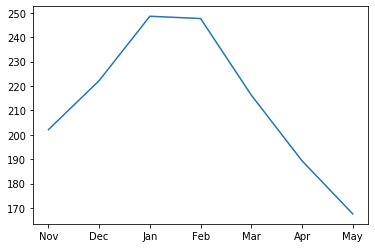

In [16]:
plt.plot(months, lights)
plt.show()